In [1]:
library('tidyverse')
library('readxl')
library('ggrepel')

library('limma')
library('edgeR')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
readxl::excel_sheets('1102025Chondrosarcoma Nanostring Normalized.xlsx')

[1] "Chondrosarcoma Nanostring Norma" "Raw data"                       
[3] "1102025Chondrosarcoma Nanostrin"

In [3]:
ns_colnames <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='Raw data',
        n_max=1
    ) %>%
    colnames()

ns_colnames

[1] "Probe Name"                                      
 [2] "Accession #"                                     
 [3] "Class Name"                                      
 [4] "20250102_30102954030325-01_10P_07.RCC"           
 [5] "20250102_30102954030325-01_12T_11.RCC"           
 [6] "20250102_30102954030325-01_16P_05.RCC"           
 [7] "20250102_30102954030325-01_17P_10.RCC"           
 [8] "20250102_30102954030325-01_18P_04.RCC"           
 [9] "20250102_30102954030325-01_2T_02.RCC"            
[10] "20250102_30102954030325-01_3P_03.RCC"            
[11] "20250102_30102954030325-01_6P_06.RCC"            
[12] "20250102_30102954030325-01_6T_08.RCC"            
[13] "20250102_30102954030325-01_8P_09.RCC"            
[14] "20250102_30102954030325-01_9P_01.RCC"            
[15] "20250102_30102954030325-01_panel standard_12.RCC"
[16] "20250102_30102954060325-01_11P_05.RCC"           
[17] "20250102_30102954060325-01_12P_02.RCC"           
[18] "20250102_30102954060325-01_13P_10.RCC"           
[19] "20250102_30102954060325-01_13T_09.RCC"           
[20] "20250102_30102954060325-01_15T_08.RCC"           
[21] "20250102_30102954060325-01_16T_01.RCC"           
[22] "20250102_30102954060325-01_19P_03.RCC"           
[23] "20250102_30102954060325-01_19T_11.RCC"           
[24] "20250102_30102954060325-01_3T_07.RCC"            
[25] "20250102_30102954060325-01_5T_04.RCC"            
[26] "20250102_30102954060325-01_8T_06.RCC"            
[27] "20250102_30102954060325-01_panel standard_12.RCC"
[28] "20250103_30102954230325-01_15P_04.RCC"           
[29] "20250103_30102954230325-01_17T_02.RCC"           
[30] "20250103_30102954230325-01_1T_03.RCC"            
[31] "20250103_30102954230325-01_4T_05.RCC"            
[32] "20250103_30102954230325-01_5P_01.RCC"            
[33] "20250103_30102954230325-01_panel standard_06.RCC"

In [4]:
cnt_wtbl <-
    read_xlsx(
        '1102025Chondrosarcoma Nanostring Normalized.xlsx',
        sheet='Raw data',
        skip=2,
        col_names=ns_colnames
    ) %>%
    select(
        -`20250102_30102954030325-01_panel standard_12.RCC`,
        -`20250102_30102954060325-01_panel standard_12.RCC`, 
        -`20250103_30102954230325-01_panel standard_06.RCC`
    )

cnt_wtbl %>%
    head()

Probe Name,Accession #,Class Name,20250102_30102954030325-01_10P_07.RCC,20250102_30102954030325-01_12T_11.RCC,20250102_30102954030325-01_16P_05.RCC,20250102_30102954030325-01_17P_10.RCC,20250102_30102954030325-01_18P_04.RCC,20250102_30102954030325-01_2T_02.RCC,20250102_30102954030325-01_3P_03.RCC,⋯,20250102_30102954060325-01_19P_03.RCC,20250102_30102954060325-01_19T_11.RCC,20250102_30102954060325-01_3T_07.RCC,20250102_30102954060325-01_5T_04.RCC,20250102_30102954060325-01_8T_06.RCC,20250103_30102954230325-01_15P_04.RCC,20250103_30102954230325-01_17T_02.RCC,20250103_30102954230325-01_1T_03.RCC,20250103_30102954230325-01_4T_05.RCC,20250103_30102954230325-01_5P_01.RCC
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A2M,NM_000014.4,Endogenous,4593,27,22,6,16,6406,14024,⋯,344,2785,9979,45,14508,16,10,123,373,43
ACVR1C,NM_145259.2,Endogenous,51,11,18,5,7,19,30,⋯,181,208,12,9,40,8,8,3,20,2
ADAM12,NM_003474.5,Endogenous,172,19,15,7,23,934,590,⋯,267,1382,637,17,849,18,8,30,26,6
ADGRE1,NM_001256252.1,Endogenous,14,15,18,4,11,42,18,⋯,78,166,11,8,23,9,14,12,17,4
ADM,NM_001124.2,Endogenous,406,22,26,6,12,133,313,⋯,107,678,136,12,92,12,8,15,34,10
ADORA2A,NM_000675.5,Endogenous,36,12,10,5,8,105,63,⋯,48,92,35,11,86,12,5,35,20,7


In [5]:
sample_tbl <-
    tibble(
        `sample_name`=
            cnt_wtbl %>%
            select(-`Probe Name`, -`Accession #`, -`Class Name`) %>%
            colnames()
    ) %>%
    mutate(
        `sample_name_simple`=
            `sample_name` %>%
            str_replace_all('.*-01_', '') %>%
            str_replace_all('_.*', ''),
        `sample_id`=str_replace_all(`sample_name_simple`, '[PT]', ''),
        `sample_type`=str_replace_all(`sample_name_simple`, '[0-9]', ''),
    ) %>%
    add_count(`sample_id`) %>%
    filter(`n` > 1)

sample_tbl

sample_name,sample_name_simple,sample_id,sample_type,n
<chr>,<chr>,<chr>,<chr>,<int>
20250102_30102954030325-01_12T_11.RCC,12T,12,T,2
20250102_30102954030325-01_16P_05.RCC,16P,16,P,2
20250102_30102954030325-01_17P_10.RCC,17P,17,P,2
20250102_30102954030325-01_3P_03.RCC,3P,3,P,2
20250102_30102954030325-01_6P_06.RCC,6P,6,P,2
20250102_30102954030325-01_6T_08.RCC,6T,6,T,2
20250102_30102954030325-01_8P_09.RCC,8P,8,P,2
20250102_30102954060325-01_12P_02.RCC,12P,12,P,2
20250102_30102954060325-01_13P_10.RCC,13P,13,P,2


In [6]:
cnt_mtx <-
    cnt_wtbl %>%
    (function(x) {
        x_mtx <-
            x %>%
            select(-`Probe Name`, -`Accession #`, -`Class Name`) %>%
            as.matrix()
        
        rownames(x_mtx) <-
            x %>%
            select(`Probe Name`) %>%
            pull()
        
        x_mtx[, sample_tbl$`sample_name`]
    })

cnt_mtx

,20250102_30102954030325-01_12T_11.RCC,20250102_30102954030325-01_16P_05.RCC,20250102_30102954030325-01_17P_10.RCC,20250102_30102954030325-01_3P_03.RCC,20250102_30102954030325-01_6P_06.RCC,20250102_30102954030325-01_6T_08.RCC,20250102_30102954030325-01_8P_09.RCC,20250102_30102954060325-01_12P_02.RCC,20250102_30102954060325-01_13P_10.RCC,20250102_30102954060325-01_13T_09.RCC,20250102_30102954060325-01_15T_08.RCC,20250102_30102954060325-01_16T_01.RCC,20250102_30102954060325-01_19P_03.RCC,20250102_30102954060325-01_19T_11.RCC,20250102_30102954060325-01_3T_07.RCC,20250102_30102954060325-01_5T_04.RCC,20250102_30102954060325-01_8T_06.RCC,20250103_30102954230325-01_15P_04.RCC,20250103_30102954230325-01_17T_02.RCC,20250103_30102954230325-01_5P_01.RCC
A2M,27,22,6,14024,908,3027,9967,34,23,27,29,23,344,2785,9979,45,14508,16,10,43
ACVR1C,11,18,5,30,34,27,49,12,7,8,14,15,181,208,12,9,40,8,8,2
ADAM12,19,15,7,590,735,1152,629,7,13,12,19,13,267,1382,637,17,849,18,8,6
ADGRE1,15,18,4,18,20,8,40,9,12,7,13,10,78,166,11,8,23,9,14,4
ADM,22,26,6,313,38,356,104,8,12,16,20,12,107,678,136,12,92,12,8,10
ADORA2A,12,10,5,63,35,43,74,5,6,7,12,6,48,92,35,11,86,12,5,7
AKT1,25,23,5,2098,1388,2398,1772,10,24,19,15,10,586,2183,1700,26,2445,16,8,10
ALDOA,82,78,9,17323,7087,10607,9282,88,46,66,74,43,2786,12251,7189,81,24431,32,24,46
ALDOC,14,19,2,206,564,753,313,8,12,11,18,8,207,503,54,12,780,16,12,2
ANGPT1,5,12,2,155,111,284,102,5,11,9,11,7,176,288,199,13,63,5,7,6


In [7]:
exp_model <-
    sample_tbl %>%
    model.matrix(data=., ~`sample_id`+`sample_type`)

exp_model

,(Intercept),sample_id13,sample_id15,sample_id16,sample_id17,sample_id19,sample_id3,sample_id5,sample_id6,sample_id8,sample_typeT
1,1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0,0,1,0,1
7,1,0,0,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,1


In [8]:
dge <-
    DGEList(cnt_mtx) %>%
    calcNormFactors()

keep <- filterByExpr(dge, exp_model)
dge <- dge[keep,, keep.lib.sizes=FALSE]
vdge <- voom(dge, exp_model)
all_fit <- lmFit(vdge, exp_model) %>% eBayes

In [9]:
coefficients(all_fit)

,(Intercept),sample_id13,sample_id15,sample_id16,sample_id17,sample_id19,sample_id3,sample_id5,sample_id6,sample_id8,sample_typeT
A2M,9.205148,-0.42291126,-0.85917484,-0.69547411,-1.49289054,1.02104297,4.69401878,0.75100475,1.9828800,4.52402743,0.299369633
ACVR1C,8.233910,-0.80419495,-0.53828653,0.08010656,-0.38003015,0.02334493,-3.22634221,-0.96479795,-2.4744229,-2.23873138,-0.372318608
ADAM12,7.950984,-0.15361270,0.14037874,-0.12187407,-0.36608349,1.57222714,1.66995321,0.04045539,2.3747753,1.72913652,0.317841214
ADGRE1,8.265115,-0.53422059,-0.55562489,-0.19211455,-0.09966124,-0.80701091,-3.69427172,-0.70986078,-3.7548391,-2.80605852,-0.358771989
ADM,8.085532,-0.18698354,-0.27222486,0.09953603,-0.64548695,0.19919136,-0.08170795,-0.21010545,-0.8223014,-1.35014771,0.421087665
ADORA2A,7.662913,-0.50191711,0.10887682,-0.42758260,-0.26150951,-1.06628936,-1.45996540,0.36398012,-1.6247452,-0.90713067,-0.208591343
AKT1,8.471386,0.17837190,-0.53125337,-0.36494031,-0.92398516,2.05027180,2.86724849,0.26724877,2.9371504,2.81372998,0.127453327
ALDOA,10.782993,-0.82460723,-1.21968793,-0.83400666,-2.04803218,2.06570109,3.07628359,-0.23496403,2.8314213,3.31561920,0.210978489
ALDOC,7.968899,-0.11552165,0.18372290,-0.08948221,-0.46321594,0.81932433,-0.71502499,-0.62836842,2.0251020,1.30903151,-0.012212044
ANGPT1,6.880743,0.75150645,0.15148419,0.51548658,0.13773609,1.38682973,1.08302104,1.05447773,1.2052088,-0.23931998,0.033754950


In [10]:
all_table <-
    topTable(all_fit, adjust.method='fdr', n=nrow(cnt_mtx), sort.by='p', coef='sample_typeT') %>%
    rownames_to_column(var='gene_symbol') %>%
    as_tibble()

all_table %>%
    head(50)

gene_symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PLA2G2A,0.8978576,9.101989,4.485175,0.0002237612,0.07567243,0.6913653
SFRP4,2.0006790,8.697837,4.398221,0.0002742139,0.07567243,0.5103004
NEG_F,-0.9504083,6.217530,-4.350851,0.0003063661,0.07567243,0.3663144
MMP1,-0.9524320,7.049133,-4.053464,0.0006150768,0.09329342,-0.2075903
HLA-DRB5,1.0615764,7.184795,4.043570,0.0006295103,0.09329342,-0.2367134
S100A9,0.9614588,7.772335,3.908769,0.0008633698,0.10662617,-0.5062901
CD74,0.7057845,12.551504,3.826327,0.0010471666,0.11069727,-0.7063602
CD163,0.7062417,7.992242,3.769818,0.0011951122,0.11069727,-0.7927511
CCL2,0.7213612,8.541850,3.591036,0.0018135623,0.14931663,-1.1673419


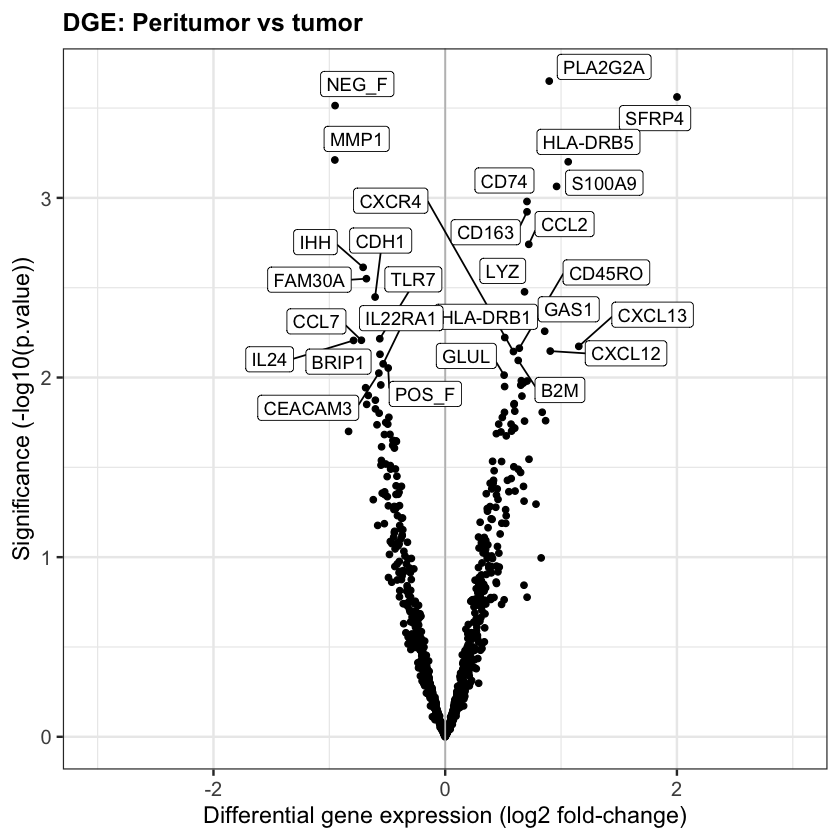

In [11]:
all_table %>%
    mutate(
        `label`=case_when(
            abs(`logFC`) >= 3 ~ str_replace_all(`gene_symbol`, ',.*', ''),
            -log10(`P.Value`) > 2 ~ str_replace_all(`gene_symbol`, ',.*', ''),
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`logFC`, y=-log10(`P.Value`))) +
        geom_point() +
        geom_vline(xintercept=0, color='gray') +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf, force=10) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='DGE: Peritumor vs tumor'
        ) +
        xlim(-3, 3) +
        theme_bw(base_size=15) +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=14),
            strip.text.x = element_text(size=15, face="bold"),
            plot.title = element_text(size=15, face="bold")
        )

In [12]:
genes_of_interest <-
    c('CD3', 'CD4', 'CD8A', 'CD8B', 'NCAM1')

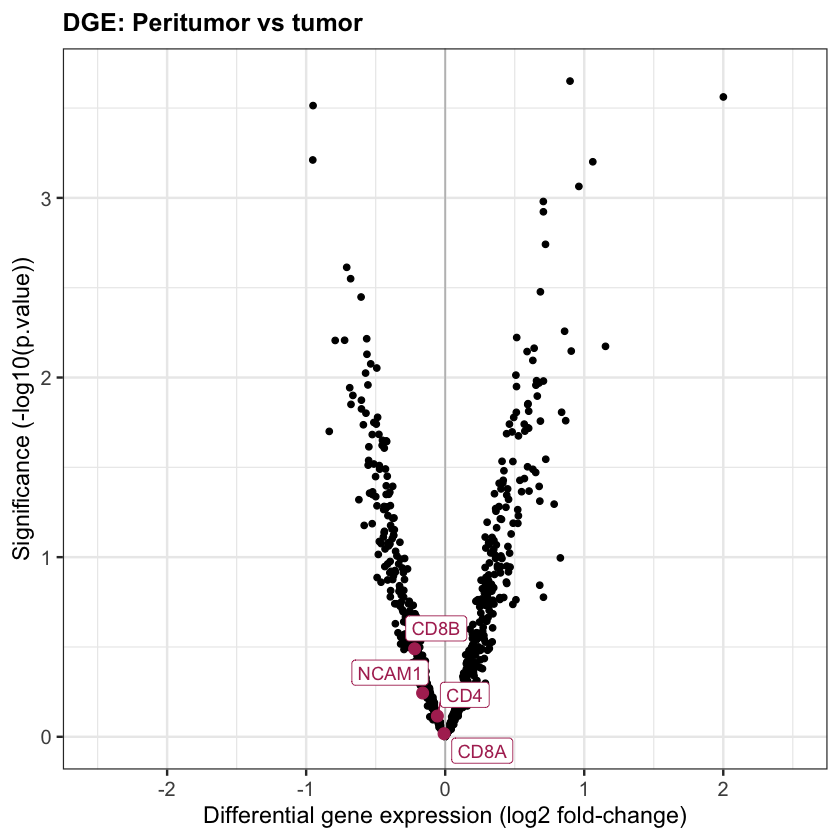

In [13]:
all_table %>%
    mutate(
        `label`=case_when(
            `gene_symbol` %in% genes_of_interest ~ `gene_symbol`,
            TRUE ~ ''
        )
    ) %>%
    ggplot(aes(x=`logFC`, y=-log10(`P.Value`))) +
        geom_point() +
        geom_vline(xintercept=0, color='gray') +
        geom_point(
            data=. %>% filter(`gene_symbol` %in% genes_of_interest),
            size=3,
            color='maroon'
        ) +
        geom_label_repel(
            data=. %>% filter(`gene_symbol` %in% genes_of_interest),
            aes(label=`label`), max.overlaps=Inf, force=10,
            color='maroon'
        ) +
        labs(
            x='Differential gene expression (log2 fold-change)',
            y='Significance (-log10(p.value))',
            title='DGE: Peritumor vs tumor'
        ) +
        xlim(-2.5, 2.5) +
        theme_bw(base_size=15) +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=14),
            strip.text.x = element_text(size=15, face="bold"),
            plot.title = element_text(size=15, face="bold")
        )